## Home task 


1. Clustering on Iris dataset

In [110]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 

data = pd.read_csv("./Iris.csv", index_col='Id')

2. Write code

##### EDA - Exploratory data analysis. (optional, will be a plus)

In [33]:
data.shape

(150, 5)

In [34]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [35]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
data.groupby('Species').describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [44]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
y = data['Species']
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

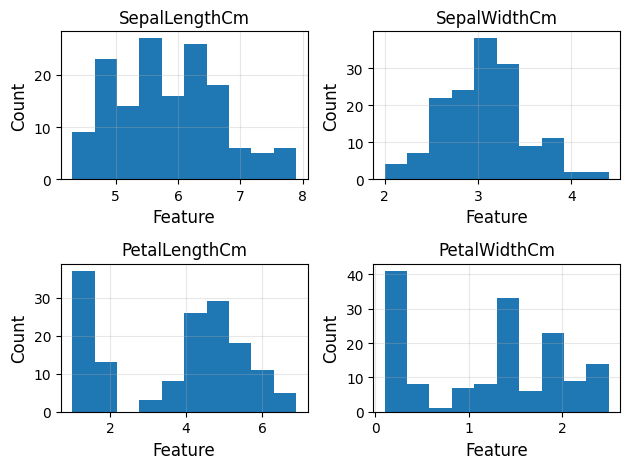

In [49]:
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.hist(data[feature])
    plt.title(feature)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()

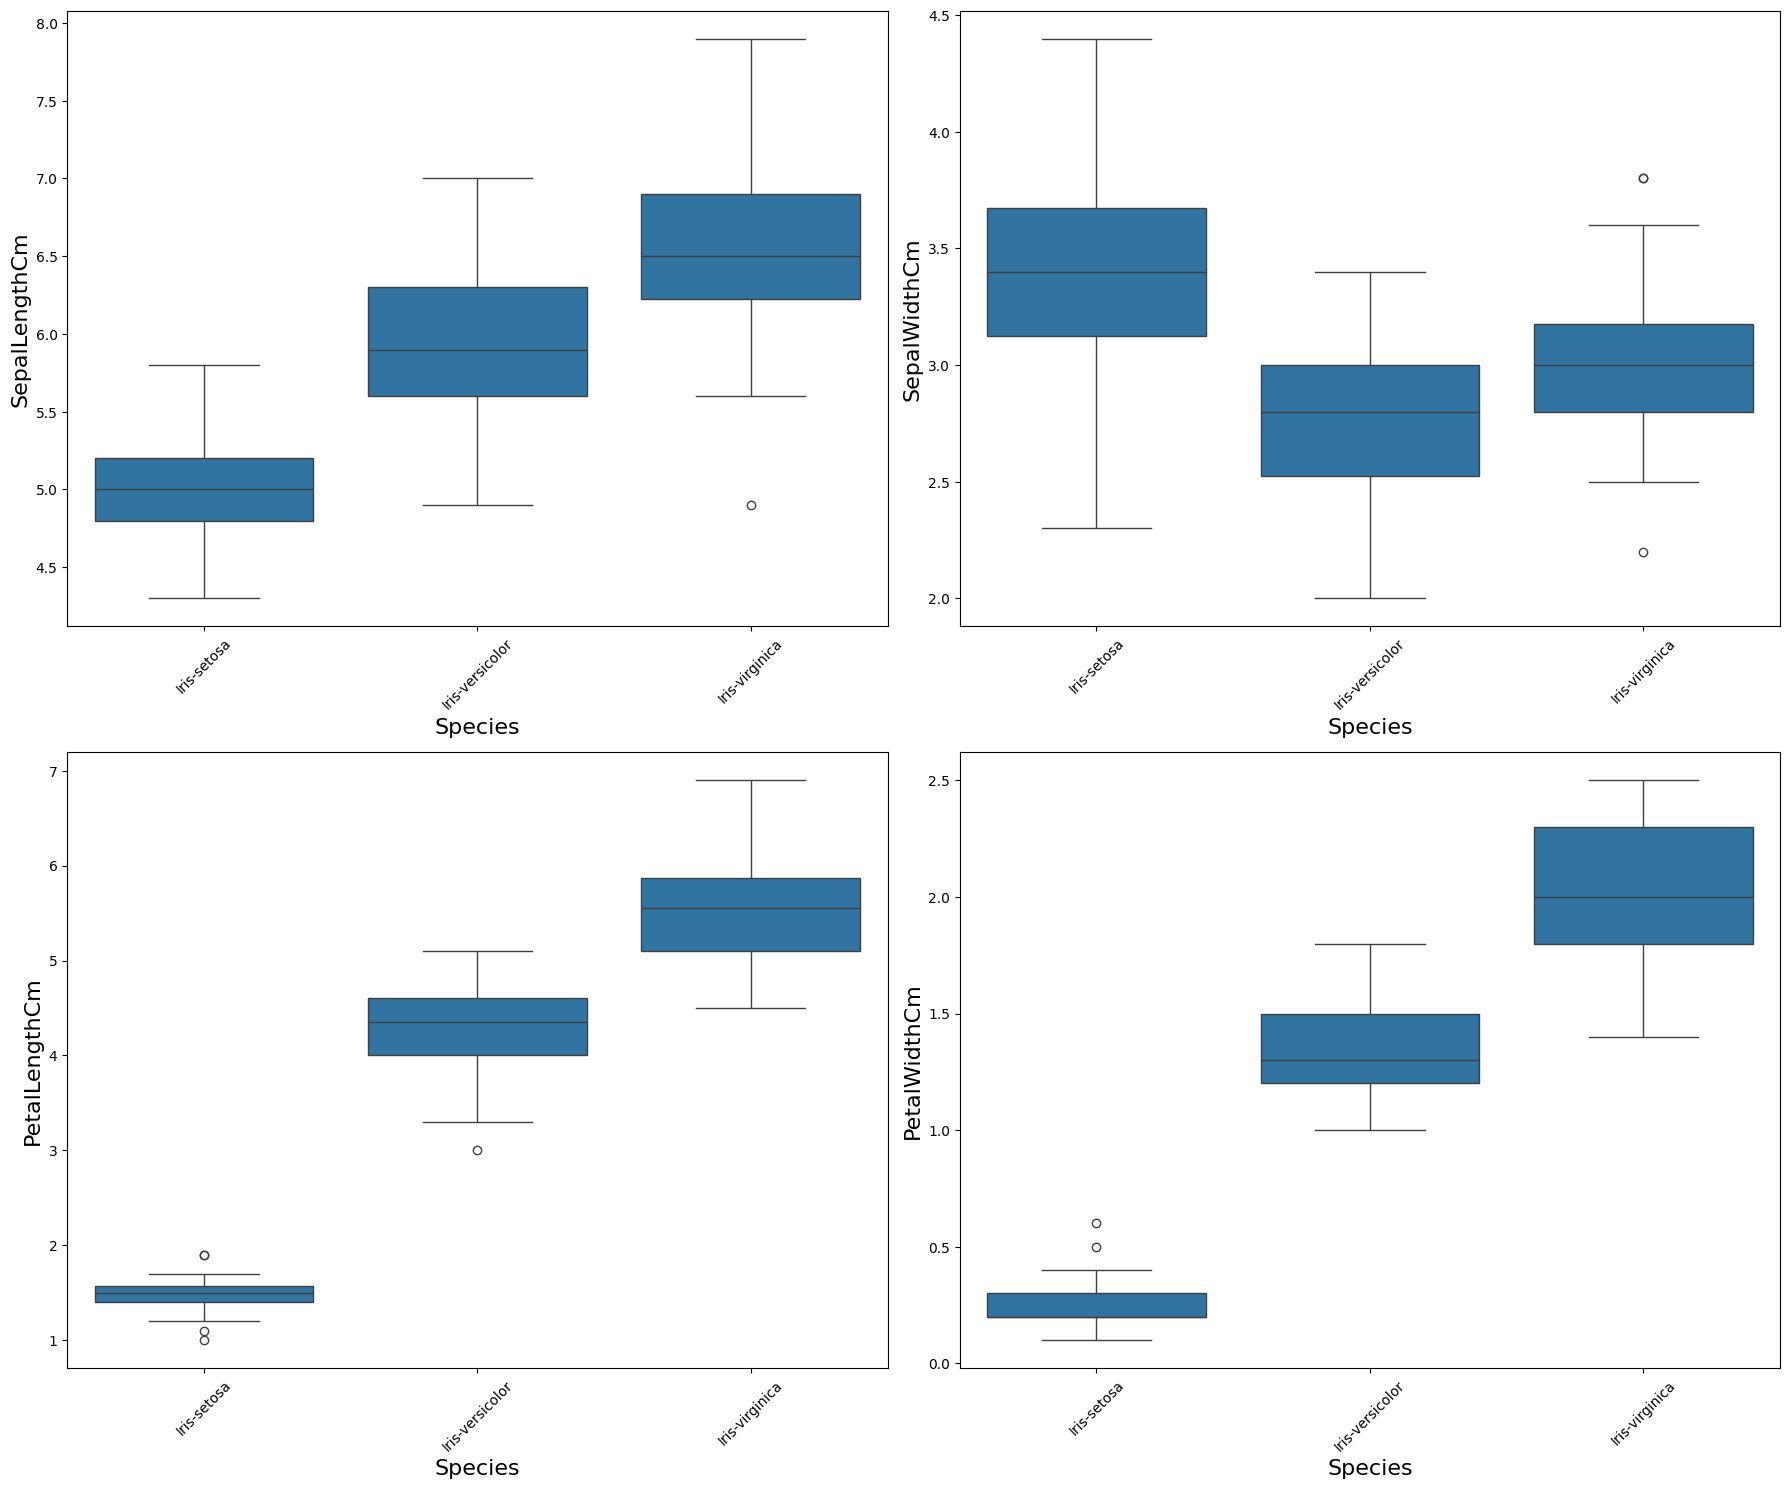

In [56]:
plt.figure(figsize=(18, 15))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='Species', y=feature)
    plt.xlabel('Species', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.xticks(rotation=45)
plt.tight_layout()

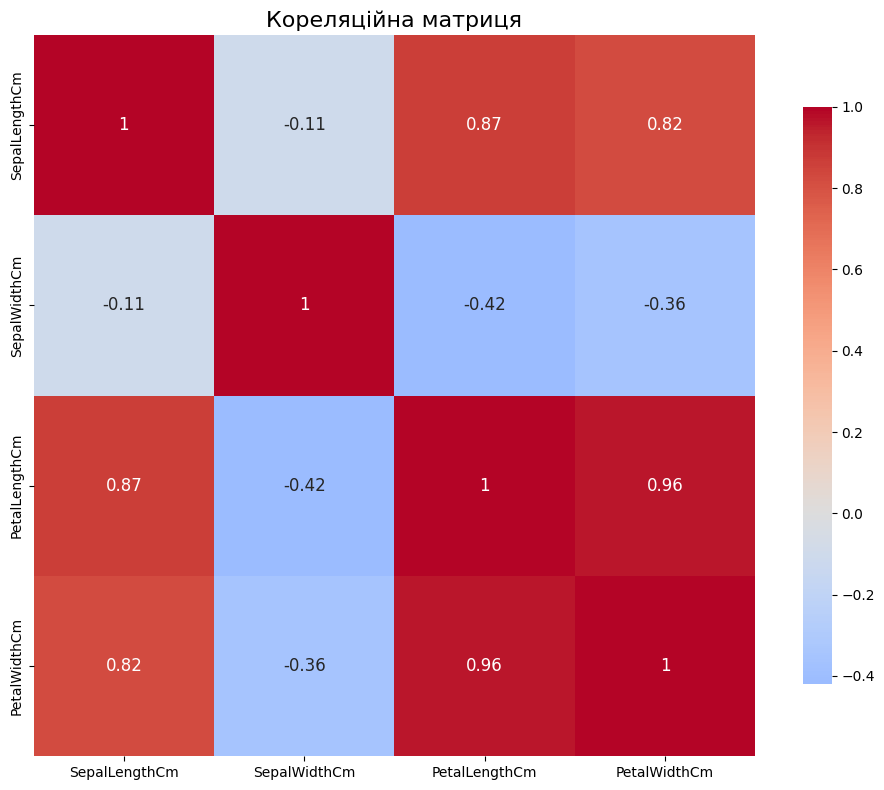

In [57]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'shrink': 0.8}, annot_kws={'size': 12})
plt.title('Кореляційна матриця', fontsize=16)
plt.tight_layout()
plt.show()

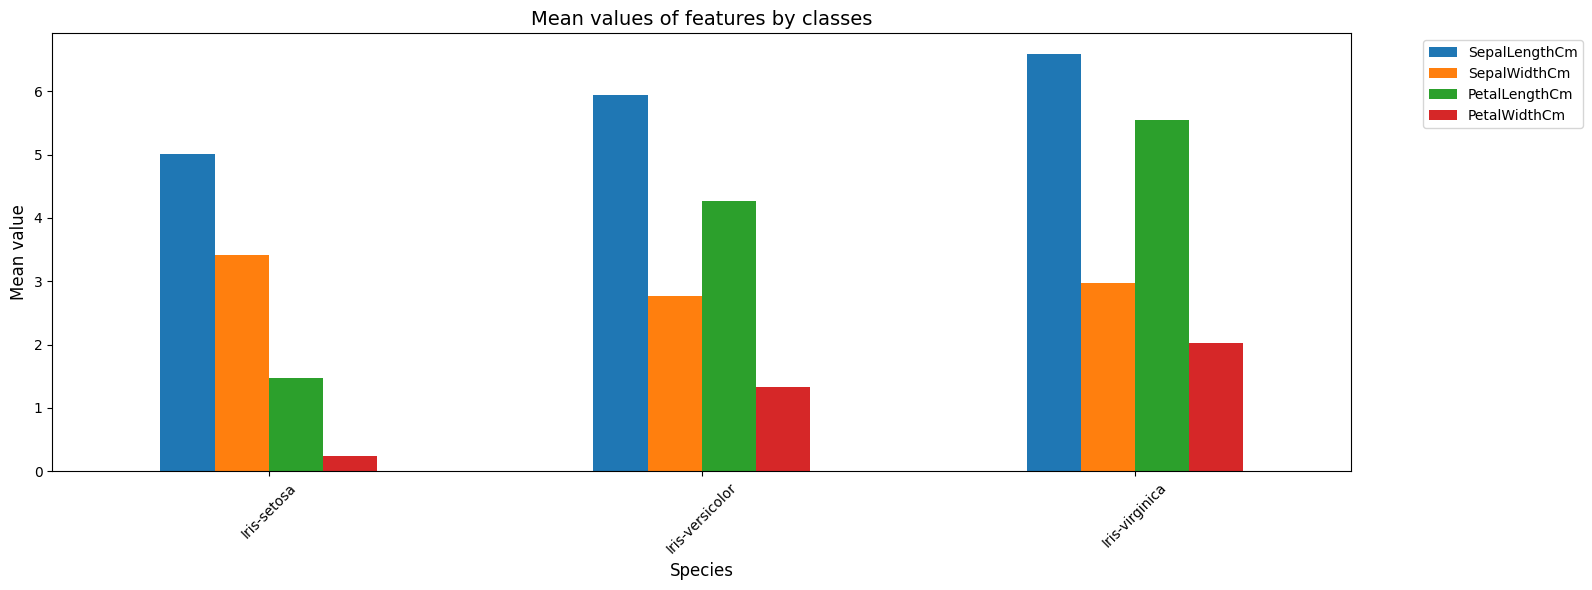

In [62]:
plt.figure(figsize=(16, 6))

means_by_species = data.groupby('Species')[features].mean()
means_by_species.plot(kind='bar', ax=plt.gca())
plt.title('Mean values of features by classes', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Mean value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1400x1200 with 0 Axes>

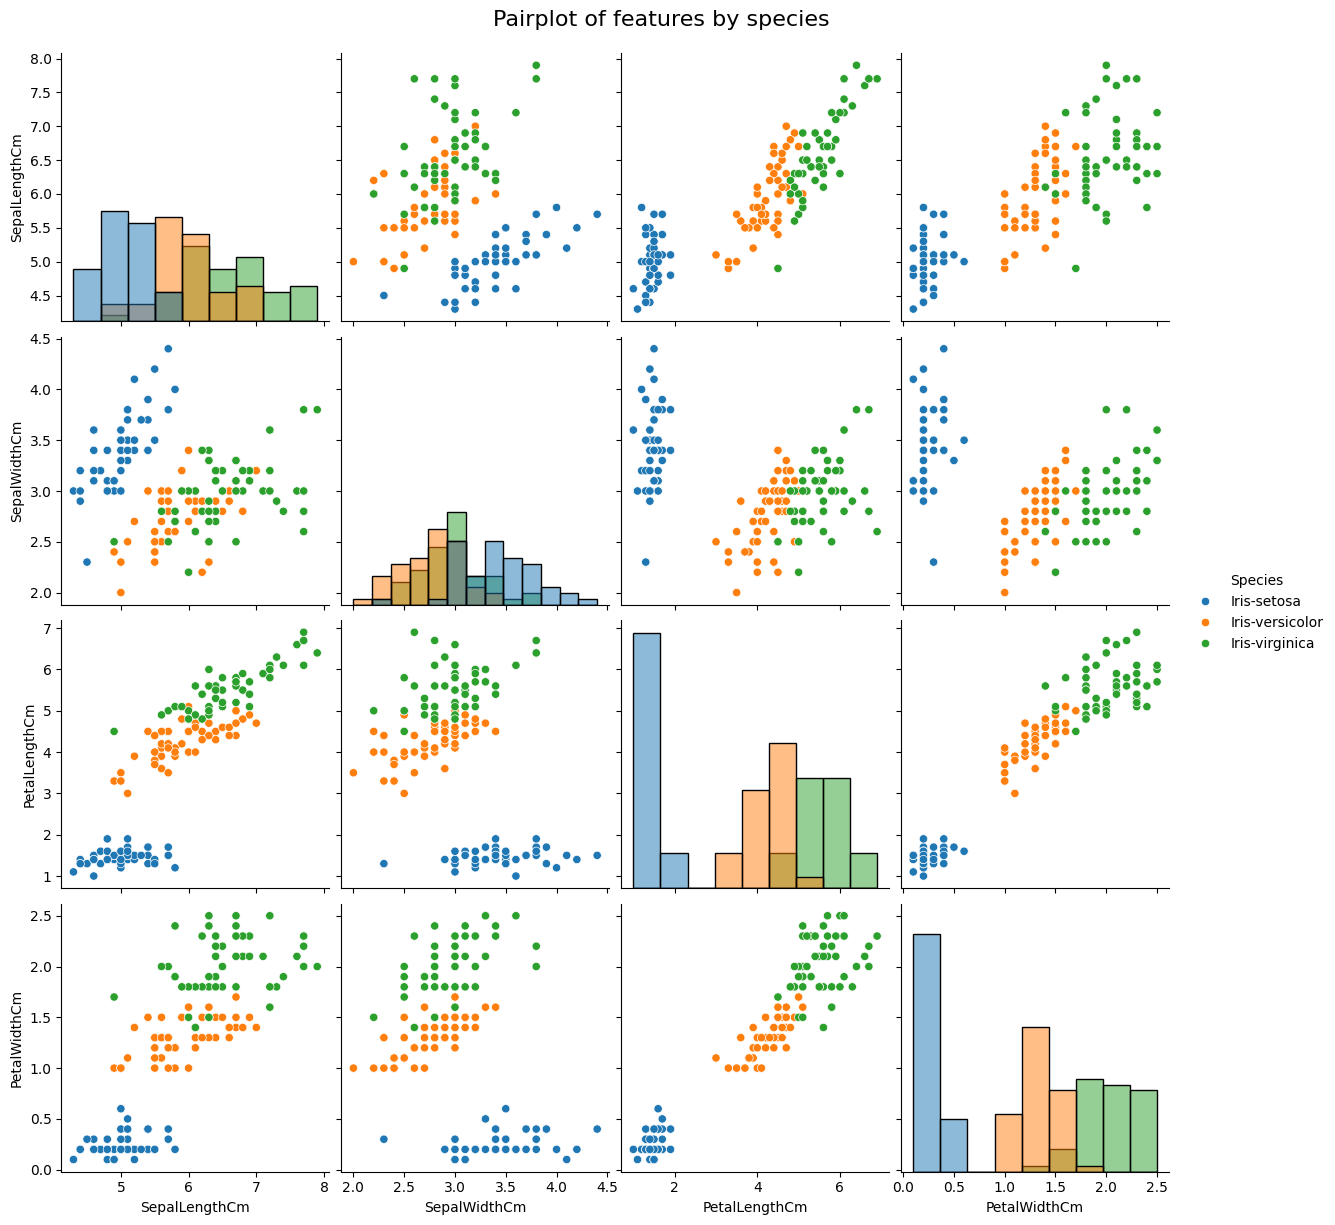

In [66]:
plt.figure(figsize=(14, 12))
sns.pairplot(data, hue='Species', vars=features, diag_kind='hist', height=3)
plt.suptitle('Pairplot of features by species', y=1.02, fontsize=16)
plt.show()

##### Preparing for clusterization

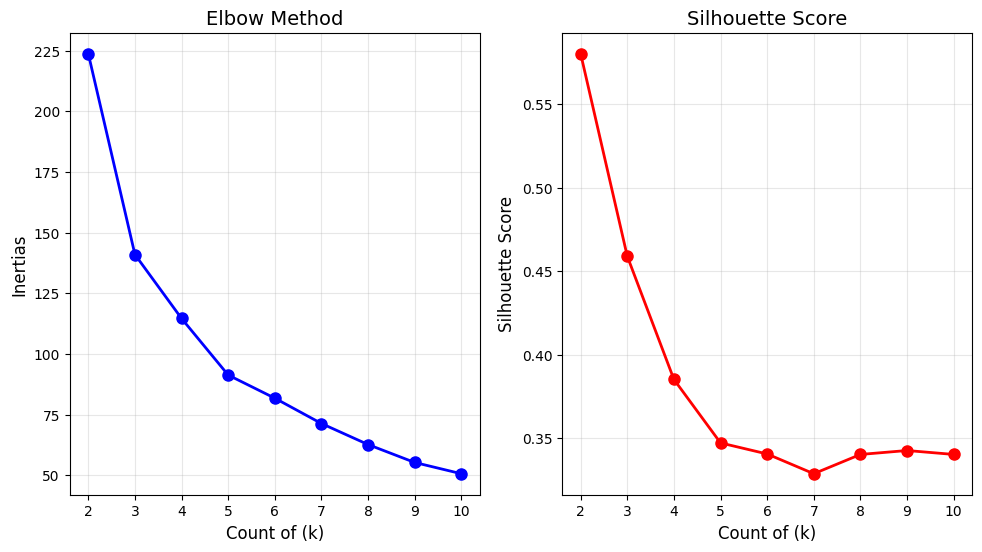

In [73]:
X_scaled = StandardScaler().fit_transform(X)
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Count of (k)', fontsize=12)
plt.ylabel('Inertias', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score', fontsize=14)
plt.xlabel('Count of (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)

###### Methods for determining the best number of clusters say that there should be 4-5.

##### Clustering

In [100]:
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)

In [ ]:
data_clustered = data.copy()
data_clustered['Cluster'] = clusters

3. Draw the beautiful graphs

In [92]:
px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='Species')

In [102]:
px.scatter(data_clustered, x='SepalLengthCm', y='SepalWidthCm', color='Cluster')

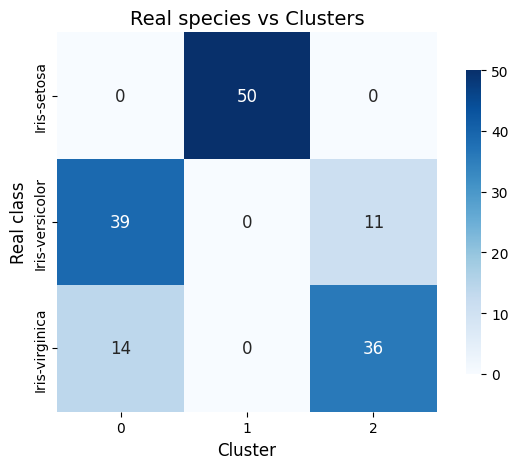

In [108]:
confusion_matrix = pd.crosstab(data['Species'], data_clustered['Cluster'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            square=True, cbar_kws={'shrink': 0.8}, annot_kws={'size': 12})
plt.title('Real species vs Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Real class', fontsize=12)

plt.tight_layout()
plt.show()

In [109]:
print("Розподіл видів по кластерах:")
print(pd.crosstab(data_clustered['Species'], data_clustered['Cluster']))

Розподіл видів по кластерах:
Cluster           0   1   2
Species                    
Iris-setosa       0  50   0
Iris-versicolor  39   0  11
Iris-virginica   14   0  36
